In [8]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
from numpy import *
import sys
import matplotlib.pyplot as plt
%matplotlib inline  
from pylab import plot,show,hist,figure,title
import seaborn as sns

In [3]:
## Load datasets
cesm_o2_200m_ds = xr.open_dataset(r'C:\Users\Miranda Sitofie\Dropbox\Session_3_data\cesm_o2_1850_2005_hist_200m_yr_ds.nc')
cesm_temp_200m_ds = xr.open_dataset(r'C:\Users\Miranda Sitofie\Dropbox\Session_3_data\cesm_temp_1850_2005_hist_50m_yr_ds.nc')

cesm_o2_50m_ds = xr.open_dataset(r'C:\Users\Miranda Sitofie\Dropbox\Session_3_data\cesm_o2_1850_2005_hist_50m_yr_ds.nc')
cesm_temp_50m_ds = xr.open_dataset(r'C:\Users\Miranda Sitofie\Dropbox\Session_3_data\cesm_temp_1850_2005_hist_50m_yr_ds.nc')

area_ds = xr.open_dataset(r'C:\Users\Miranda Sitofie\Dropbox\Session_3_data\cesm_area_cm2_ds.nc')
area_ds

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320)
Coordinates:
    TLAT     (nlat, nlon) float64 ...
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    TAREA    (nlat, nlon) float64 ...

In [6]:
print(cesm_o2_200m_ds)
print(cesm_temp_200m_ds)

<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320, year: 157)
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 ...
    member_id  int64 ...
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Data variables:
    O2         (year, nlat, nlon) float32 ...
<xarray.Dataset>
Dimensions:    (nlat: 384, nlon: 320, year: 157)
Coordinates:
    TLAT       (nlat, nlon) float64 ...
    TLONG      (nlat, nlon) float64 ...
    z_t        float32 ...
    member_id  int64 ...
  * year       (year) int64 1850 1851 1852 1853 1854 ... 2003 2004 2005 2006
Dimensions without coordinates: nlat, nlon
Data variables:
    TEMP       (year, nlat, nlon) float32 ...


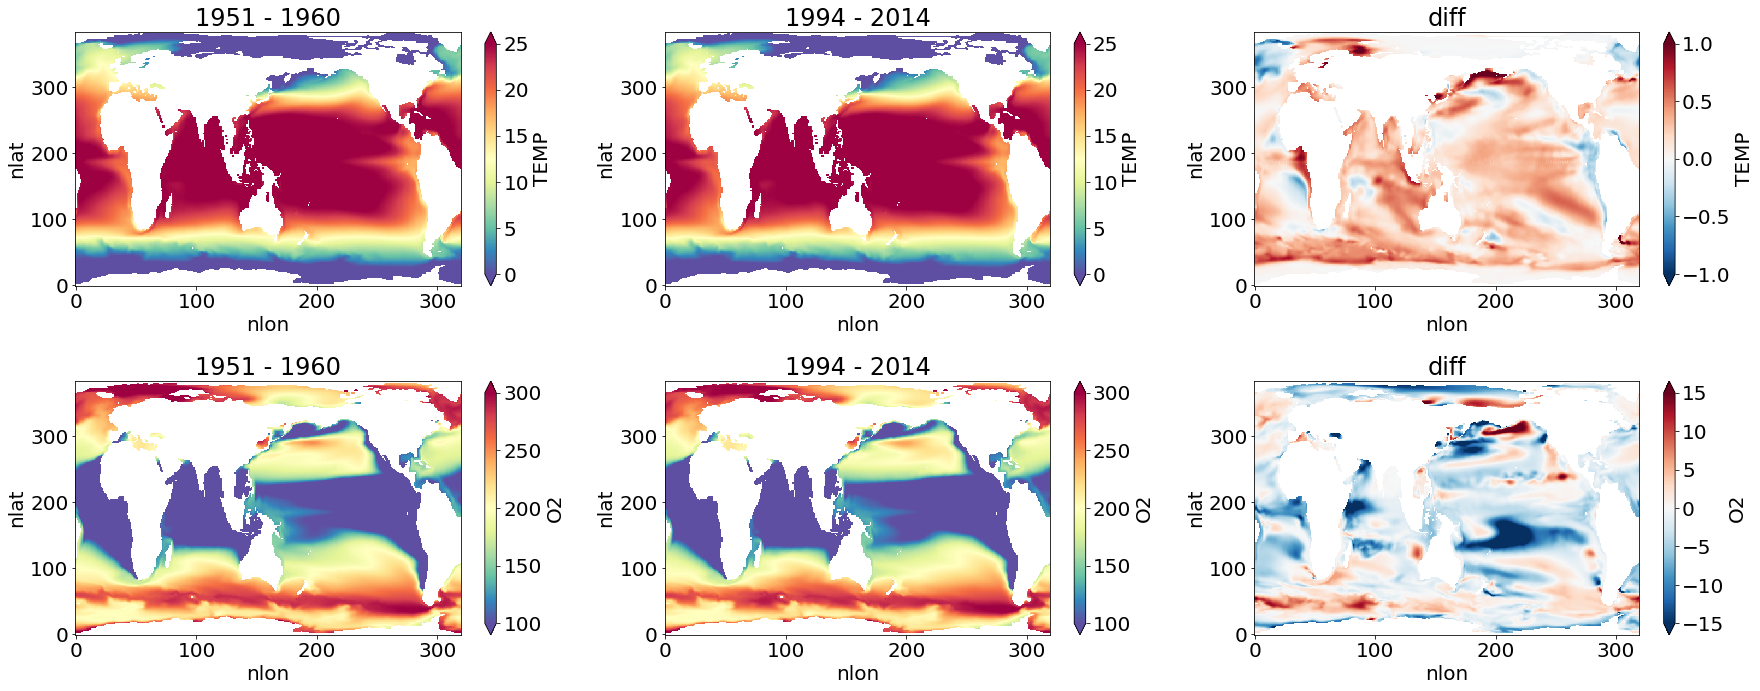

In [9]:
### compute long-term mean changes 
plt.rcParams['font.size'] = 20
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(2,3,1)
cesm_temp_200m_ds.TEMP.sel(year =slice(1951,1960)).mean('year').plot(vmin = 0,vmax = 25,cmap = 'Spectral_r')
plt.title('1951 - 1960')
plt.subplot(2,3,2)
cesm_temp_200m_ds.TEMP.sel(year =slice(1994,2014)).mean('year').plot(vmin = 0,vmax = 25,cmap = 'Spectral_r')
plt.title('1994 - 2014')
plt.subplot(2,3,3)
(cesm_temp_200m_ds.TEMP.sel(year =slice(1994,2014)).mean('year') \
 - cesm_temp_200m_ds.TEMP.sel(year =slice(1951,1960)).mean('year')).plot(vmin = -1.0,vmax = 1.0,cmap = 'RdBu_r')
plt.title('diff')

plt.subplot(2,3,4)
cesm_o2_200m_ds.O2.sel(year =slice(1951,1960)).mean('year').plot(vmin = 100,vmax = 300,cmap = 'Spectral_r')
plt.title('1951 - 1960')
plt.subplot(2,3,5)
cesm_o2_200m_ds.O2.sel(year =slice(1994,2014)).mean('year').plot(vmin = 100,vmax = 300,cmap = 'Spectral_r')
plt.title('1994 - 2014')
plt.subplot(2,3,6)
(cesm_o2_200m_ds.O2.sel(year =slice(1994,2014)).mean('year') \
 - cesm_o2_200m_ds.O2.sel(year =slice(1951,1960)).mean('year')).plot(vmin = -15.0,vmax = 15.0,cmap = 'RdBu_r')
plt.title('diff')
plt.tight_layout()



In [10]:
%%time
## calculate long-term time series anomalies 

def F_time_series_anomalies(var,area):
    """computes time series anamolies"""
    
    ## calculate the anomaly by removing the mean 
    var_anomaly = var - var.mean('year')
    
    ## compute total area sum
    area_sum_ds = area.sum(dim = ['nlon','nlat'])
    
    ## calculate the weighted mean
    var_anomaly_ds = ((var_anomaly*area).sum(dim = ['nlon','nlat']))/area_sum_ds
    
    return var_anomaly_ds
    
    
temp_200m_amom_ds = F_time_series_anomalies(cesm_temp_200m_ds.TEMP,area_ds)
temp_50m_amom_ds = F_time_series_anomalies(cesm_temp_50m_ds.TEMP,area_ds)

o2_200m_amom_ds = F_time_series_anomalies(cesm_o2_200m_ds.O2,area_ds)
o2_50m_amom_ds = F_time_series_anomalies(cesm_o2_50m_ds.O2,area_ds)

Wall time: 13.4 s


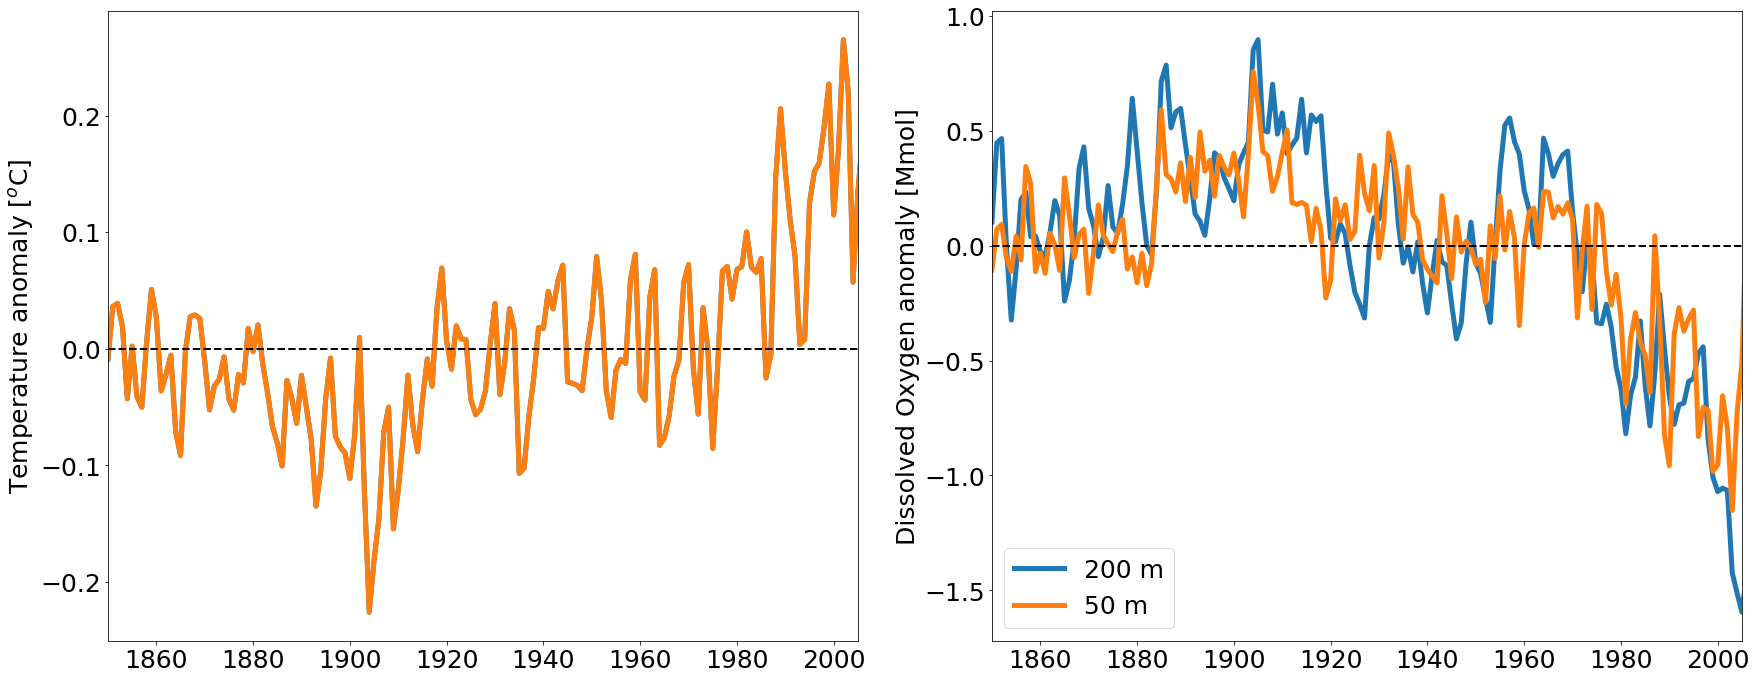

In [11]:
## plot time series
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_200m_amom_ds.TAREA)
plt.plot(cesm_temp_50m_ds.TEMP.year,temp_50m_amom_ds.TAREA)
plt.plot(cesm_temp_200m_ds.TEMP.year,np.zeros(len(cesm_temp_200m_ds.TEMP.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.ylabel('Temperature anomaly [$^o$C]')

plt.subplot(122)
plt.plot(cesm_o2_200m_ds.O2.year,o2_200m_amom_ds.TAREA,label = '200 m')
plt.plot(cesm_o2_50m_ds.O2.year,o2_50m_amom_ds.TAREA,label = '50 m')
plt.plot(cesm_o2_200m_ds.O2.year,np.zeros(len(cesm_o2_200m_ds.O2.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.legend(loc = 3)
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')

plt.tight_layout()

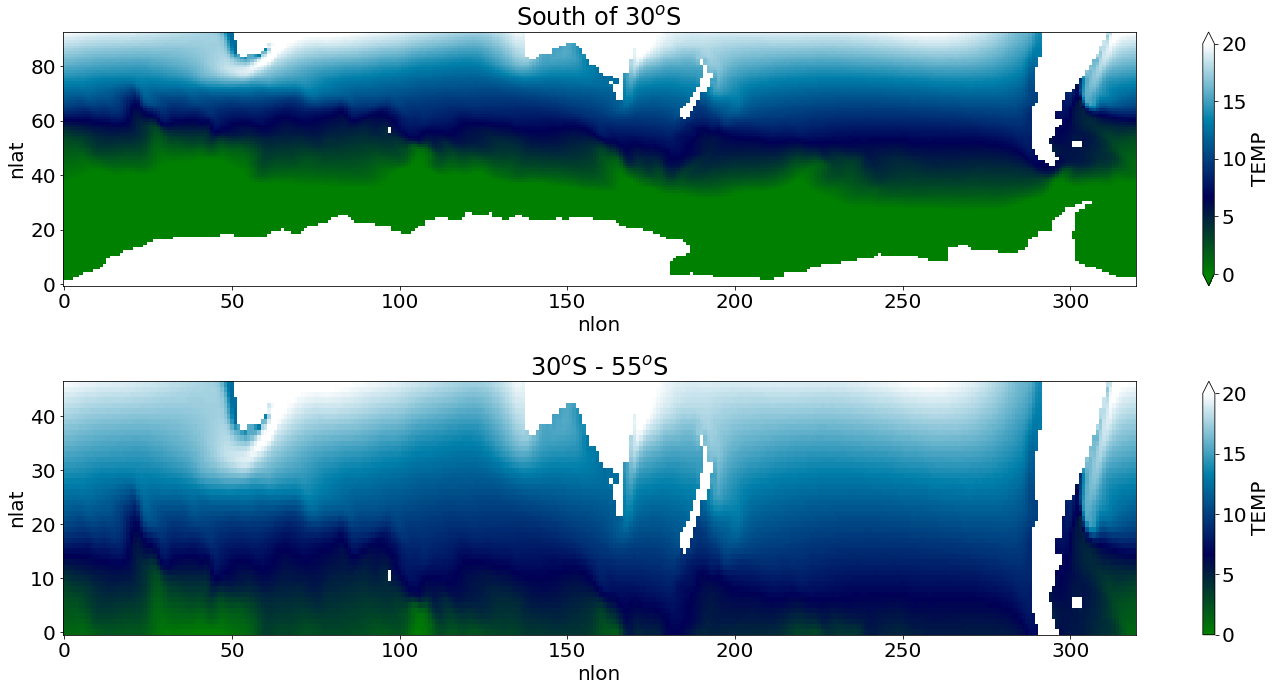

In [12]:
### Sample regional 
plt.rcParams['font.size'] = 20
plt.figure(figsize=[20,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(2,1,1)
temp_30S_ds = cesm_temp_200m_ds.where(cesm_temp_200m_ds['TLAT'] <= -30, drop=True)
temp_30S_ds.TEMP[:,:,:].median('year').plot(vmin = 0,vmax = 20,cmap = 'ocean')
plt.title('South of 30$^o$S')
plt.subplot(2,1,2)
temp_30S_ds = cesm_temp_200m_ds.where(cesm_temp_200m_ds['TLAT'] <= -30, drop=True)
temp_55S_30S_ds = temp_30S_ds.where(temp_30S_ds['TLAT'] >= -55, drop=True)
temp_55S_30S_ds.TEMP[:,:,:].median('year').plot(vmin = 0,vmax = 20,cmap = 'ocean')
plt.title('30$^o$S - 55$^o$S')

plt.tight_layout()

In [13]:
%%time
### Define regional boundaries 
def F_30S(var):
    """sample south of 3OS"""
    var_30S_ds = var.where(var['TLAT'] <= -30, drop=True)
    
    return var_30S_ds

def F_55_30S(var):
    """sample 55S - 3OS"""
    var_30S_ds = var.where(var['TLAT'] <= -30, drop=True)
    var_55_30S_ds = var_30S_ds.where(var_30S_ds['TLAT'] > -55, drop=True)
    
    return var_55_30S_ds
### computes regional anomalies time series 
temp_30S_200m_amom_ds = F_time_series_anomalies(F_30S(cesm_temp_200m_ds.TEMP),F_30S(area_ds.TAREA))
temp_30S_50m_amom_ds = F_time_series_anomalies(F_30S(cesm_temp_50m_ds.TEMP),F_30S(area_ds.TAREA))
temp_55_30S_200m_amom_ds = F_time_series_anomalies(F_55_30S(cesm_temp_50m_ds.TEMP),F_55_30S(area_ds.TAREA))
temp_55_30S_50m_amom_ds = F_time_series_anomalies(F_55_30S(cesm_temp_50m_ds.TEMP),F_55_30S(area_ds.TAREA))

o2_30S_200m_amom_ds = F_time_series_anomalies(F_30S(cesm_o2_200m_ds.O2),F_30S(area_ds.TAREA))
o2_30S_50m_amom_ds = F_time_series_anomalies(F_30S(cesm_o2_50m_ds.O2),F_30S(area_ds.TAREA))
o2_55_30S_200m_amom_ds = F_time_series_anomalies(F_55_30S(cesm_o2_200m_ds.O2),F_55_30S(area_ds.TAREA))
o2_55_30S_50m_amom_ds = F_time_series_anomalies(F_55_30S(cesm_o2_50m_ds.O2),F_55_30S(area_ds.TAREA))

Wall time: 5.42 s


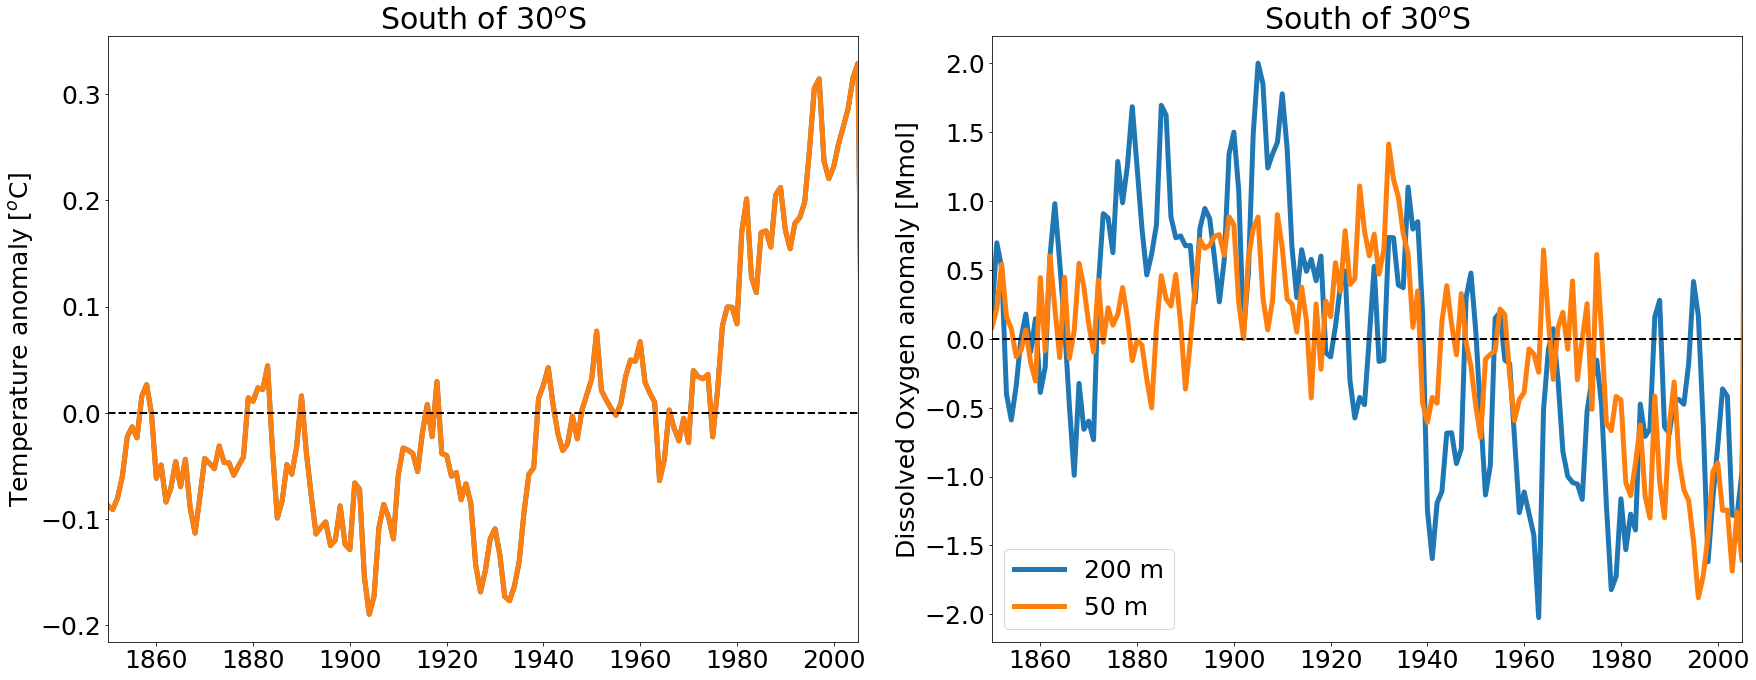

In [14]:
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_30S_200m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_30S_50m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,np.zeros(len(cesm_temp_200m_ds.TEMP.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.title('South of 30$^o$S')
plt.ylabel('Temperature anomaly [$^o$C]')

plt.subplot(122)
plt.plot(cesm_o2_200m_ds.O2.year,o2_30S_200m_amom_ds,label = '200 m')
plt.plot(cesm_o2_50m_ds.O2.year,o2_30S_50m_amom_ds,label = '50 m')
plt.plot(cesm_o2_200m_ds.O2.year,np.zeros(len(cesm_o2_200m_ds.O2.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.legend(loc = 3)
plt.title('South of 30$^o$S')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.ylim(-2.2,2.2)

plt.tight_layout()

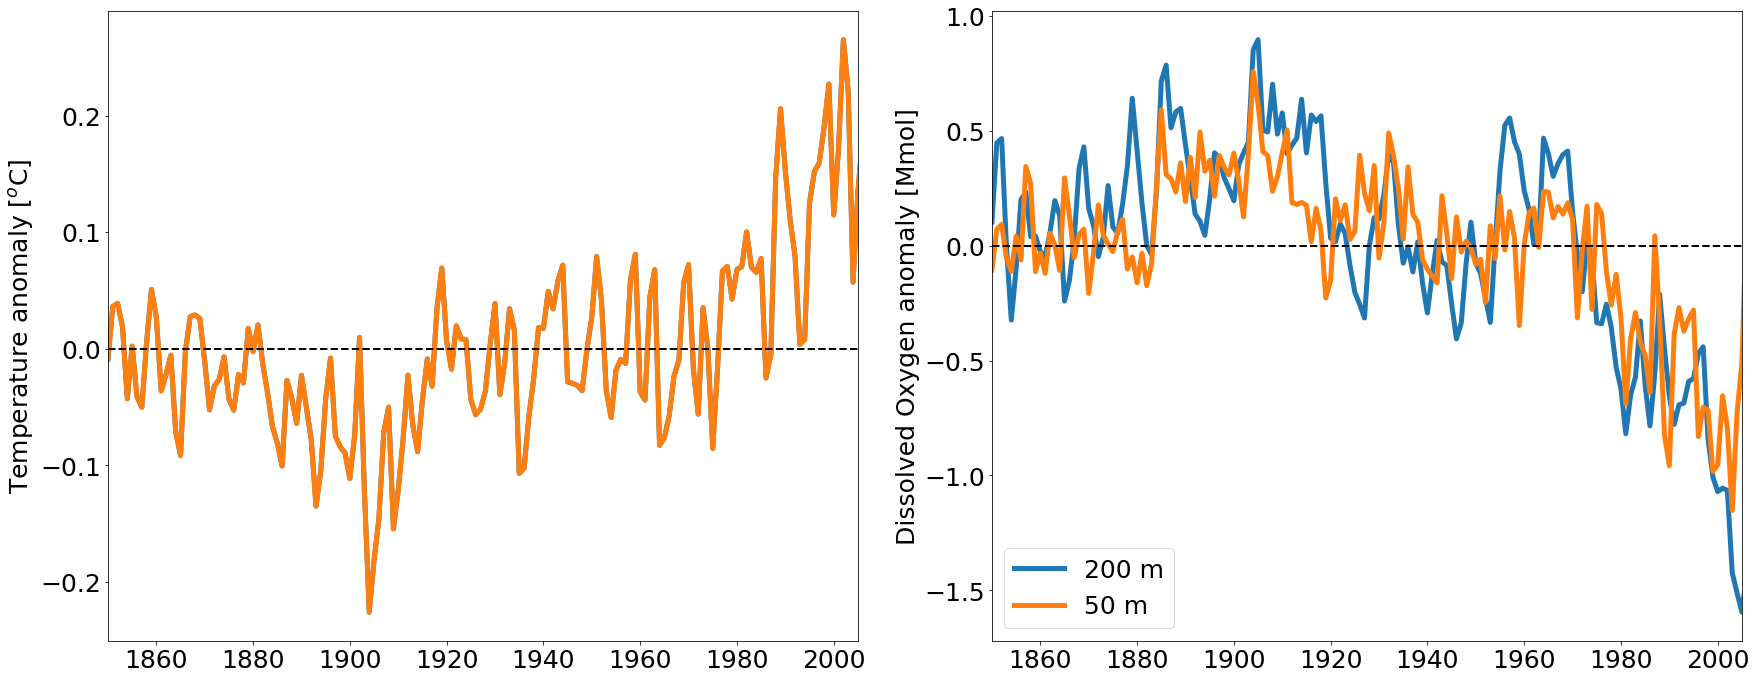

In [15]:
## plot time series
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_200m_amom_ds.TAREA)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_50m_amom_ds.TAREA)
plt.plot(cesm_temp_200m_ds.TEMP.year,np.zeros(len(cesm_temp_200m_ds.TEMP.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.ylabel('Temperature anomaly [$^o$C]')

plt.subplot(122)
plt.plot(cesm_o2_200m_ds.O2.year,o2_200m_amom_ds.TAREA,label = '200 m')
plt.plot(cesm_o2_50m_ds.O2.year,o2_50m_amom_ds.TAREA,label = '50 m')
plt.plot(cesm_o2_200m_ds.O2.year,np.zeros(len(cesm_o2_200m_ds.O2.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.legend(loc = 3)
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')

plt.tight_layout()

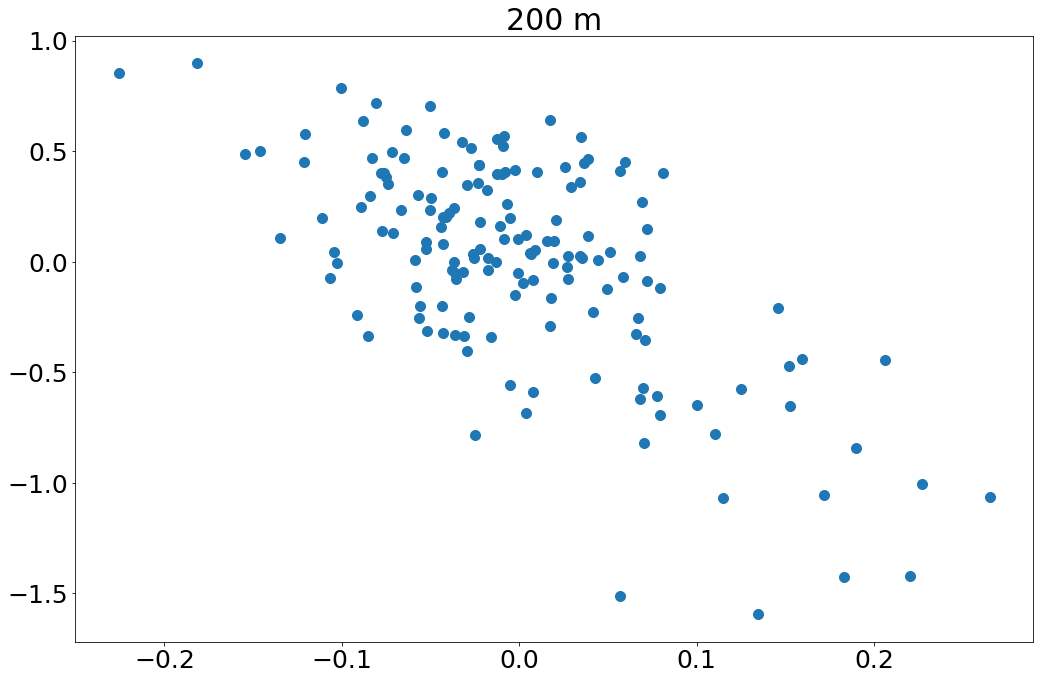

In [16]:
### Making a scatter plot
plt.rcParams['font.size'] = 25
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 5

plt.scatter(temp_200m_amom_ds.TAREA,o2_200m_amom_ds.TAREA,s = 100)
plt.title('200 m')
plt.tight_layout()

[]

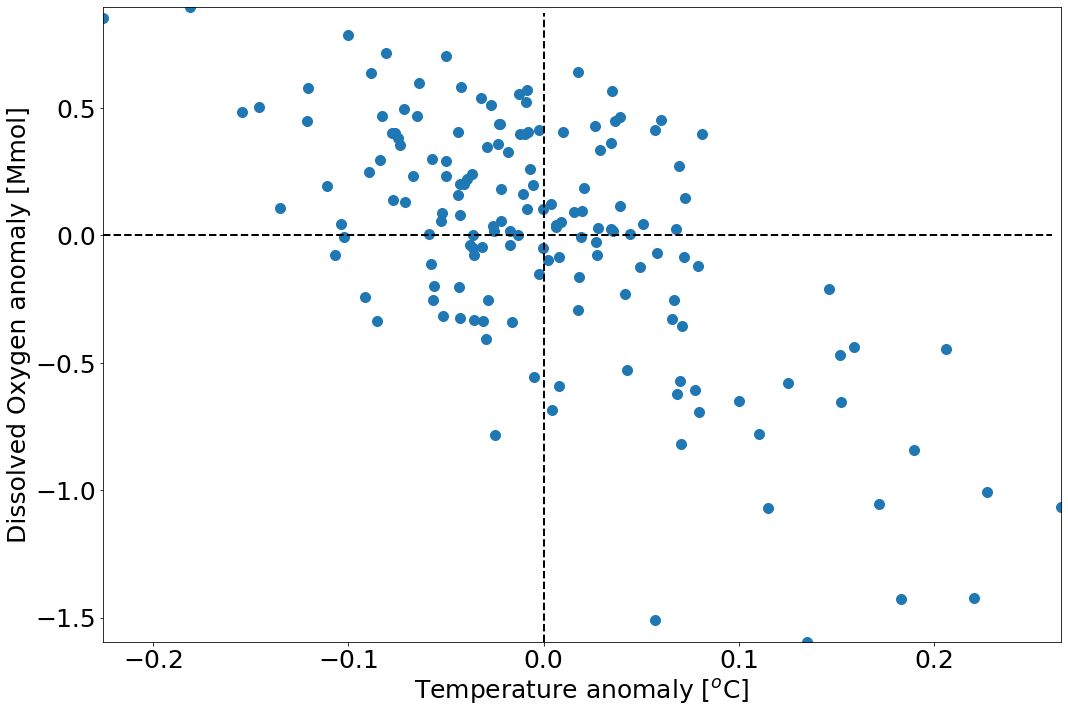

In [50]:
### Making a scatter plot 2
plt.rcParams['font.size'] = 25
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 5

plt.scatter(temp_200m_amom_ds.TAREA,o2_200m_amom_ds.TAREA,s = 100)

plt.xlim(temp_200m_amom_ds.TAREA.min(),temp_200m_amom_ds.TAREA.max())
plt.ylim(o2_200m_amom_ds.TAREA.min(),o2_200m_amom_ds.TAREA.max())
plt.tight_layout()

plt.plot(np.arange(temp_200m_amom_ds.TAREA.min(),temp_200m_amom_ds.TAREA.max(),abs(temp_200m_amom_ds.TAREA.min()-temp_200m_amom_ds.TAREA.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(o2_200m_amom_ds.TAREA.min(),o2_200m_amom_ds.TAREA.max(),abs(o2_200m_amom_ds.TAREA.min()-o2_200m_amom_ds.TAREA.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.plot()

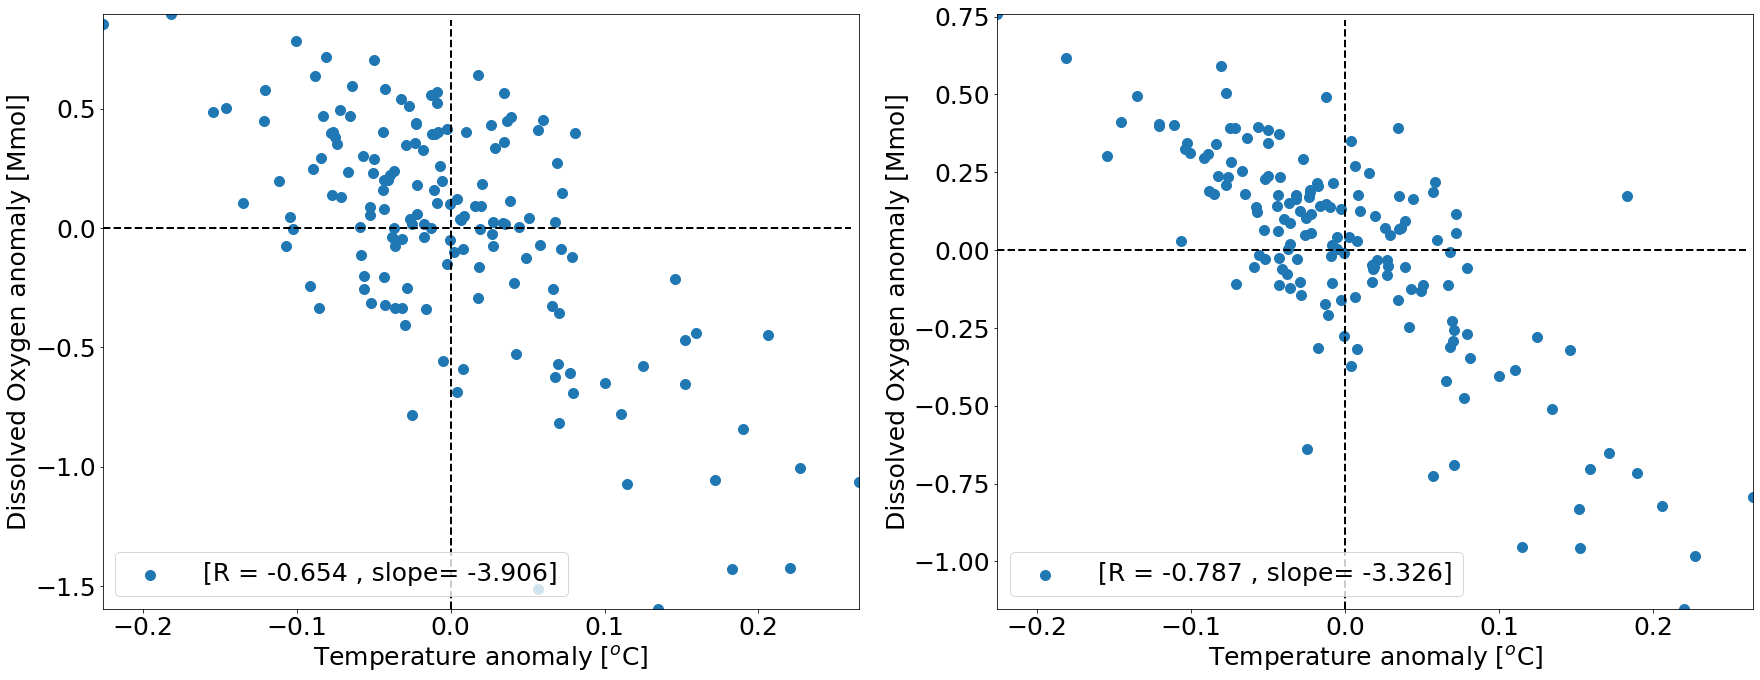

In [17]:
### Making a scatter using and adding the correlation coefficient and slope
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
X = temp_200m_amom_ds.TAREA
Y = o2_200m_amom_ds.TAREA
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
# sns.regplot(X, Y)
plt.xlim(temp_200m_amom_ds.TAREA.min(),temp_200m_amom_ds.TAREA.max())
plt.ylim(o2_200m_amom_ds.TAREA.min(),o2_200m_amom_ds.TAREA.max())

plt.plot(np.arange(temp_200m_amom_ds.TAREA.min(),temp_200m_amom_ds.TAREA.max(),abs(temp_200m_amom_ds.TAREA.min()-temp_200m_amom_ds.TAREA.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(o2_200m_amom_ds.TAREA.min(),o2_200m_amom_ds.TAREA.max(),abs(o2_200m_amom_ds.TAREA.min()-o2_200m_amom_ds.TAREA.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.legend(loc= 3)

plt.subplot(122)
X = temp_50m_amom_ds.TAREA
Y = o2_50m_amom_ds.TAREA
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
# sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.legend(loc= 3)

plt.tight_layout()

In [18]:
!pip install seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


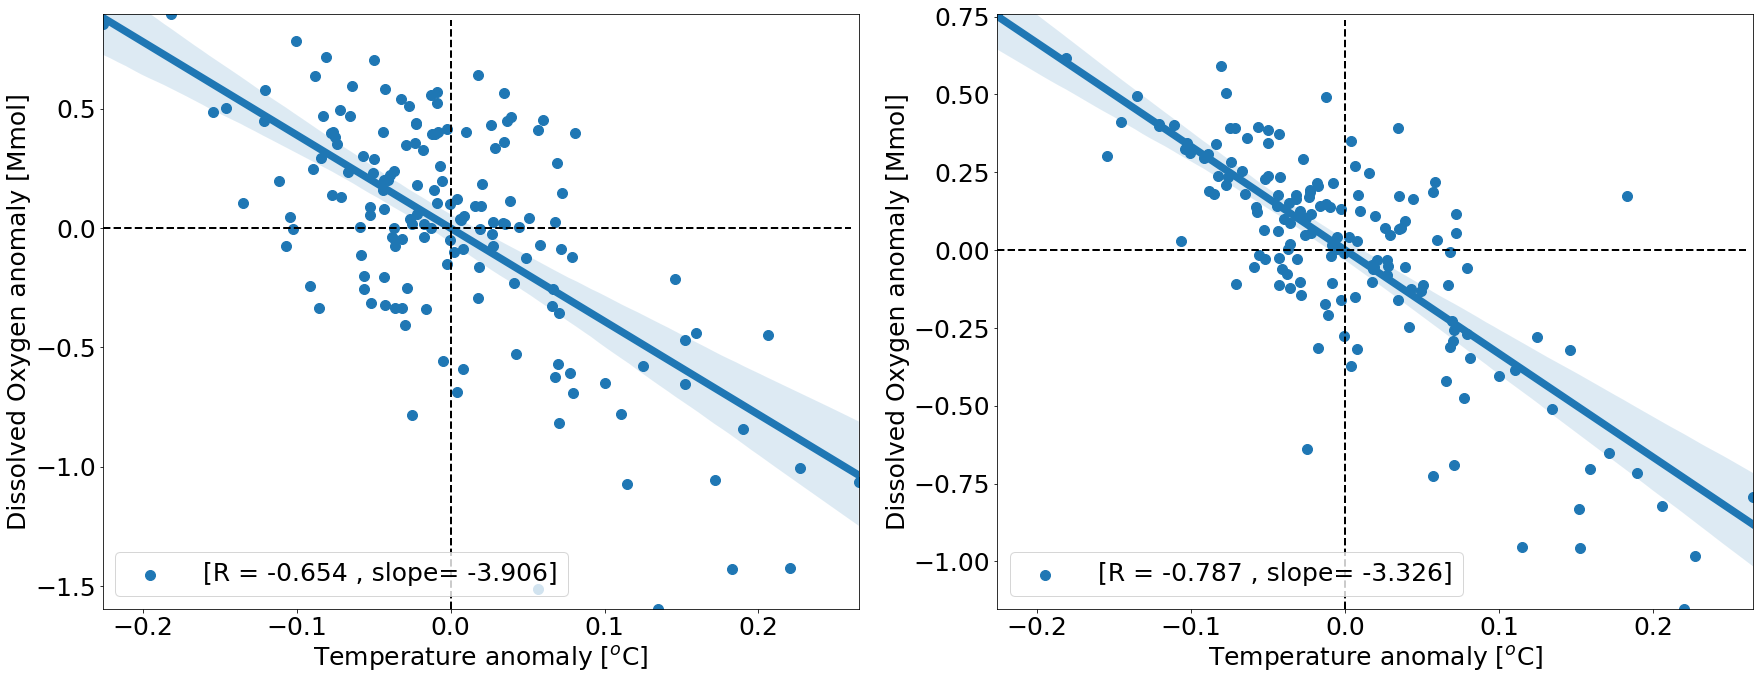

In [55]:
### Making a scatter using, adding a regressiong line, using seaborn (to install; pip install seaborn or conda install seaborn)
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
X = temp_200m_amom_ds.TAREA
Y = o2_200m_amom_ds.TAREA
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
sns.regplot(X, Y)
plt.xlim(temp_200m_amom_ds.TAREA.min(),temp_200m_amom_ds.TAREA.max())
plt.ylim(o2_200m_amom_ds.TAREA.min(),o2_200m_amom_ds.TAREA.max())

plt.plot(np.arange(temp_200m_amom_ds.TAREA.min(),temp_200m_amom_ds.TAREA.max(),abs(temp_200m_amom_ds.TAREA.min()-temp_200m_amom_ds.TAREA.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(o2_200m_amom_ds.TAREA.min(),o2_200m_amom_ds.TAREA.max(),abs(o2_200m_amom_ds.TAREA.min()-o2_200m_amom_ds.TAREA.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.legend(loc= 3)

plt.subplot(122)
X = temp_50m_amom_ds.TAREA
Y = o2_50m_amom_ds.TAREA
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly [$^o$C]')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.legend(loc= 3)

plt.tight_layout()

In [ ]:
##Exercises 

In [ ]:
##Exercise 1: Calculate and plot the time series anomaly of temperature and dissolved oxygen in the tropical regions (15N - 15N) for the period 1850 - 2005 at 200 m and 50m
2) Perform the same calculation plot  the region between 15N - 60N and North of 60N

In [23]:
def F_15S(var):
    """15S"""
    var_15S_ds = var.where(var['TLAT'] <= -15, drop=True)
    
    return var_15S_ds

def F_15S_15N(var):
    """sample 15S - 15N"""
    var_15N_ds = var.where(var['TLAT'] <= -15, drop=True)
    var_15S_15N_ds = var_15N_ds.where(var_15N_ds['TLAT'] > -15, drop=True)
    
    return var_15S_15N_ds
### computes regional anomalies time series 
temp_15S_200m_amom_ds = F_time_series_anomalies(F_15S(cesm_temp_200m_ds.TEMP),F_15S(area_ds.TAREA))
temp_15S_50m_amom_ds = F_time_series_anomalies(F_15S(cesm_temp_50m_ds.TEMP),F_15S(area_ds.TAREA))
temp_15S_15N_200m_amom_ds = F_time_series_anomalies(F_15S_15N(cesm_temp_50m_ds.TEMP),F_15S_15N(area_ds.TAREA))
temp_15S_15N_50m_amom_ds = F_time_series_anomalies(F_15S_15N(cesm_temp_50m_ds.TEMP),F_15S_15N(area_ds.TAREA))

o2_15S_200m_amom_ds = F_time_series_anomalies(F_15S(cesm_o2_200m_ds.O2),F_15S(area_ds.TAREA))
o2_15S_50m_amom_ds = F_time_series_anomalies(F_15S(cesm_o2_50m_ds.O2),F_15S(area_ds.TAREA))
o2_15S_15N_200m_amom_ds = F_time_series_anomalies(F_15S_15N(cesm_o2_200m_ds.O2),F_15S_15N(area_ds.TAREA))
o2_15S_15N_50m_amom_ds = F_time_series_anomalies(F_15S_15N(cesm_o2_50m_ds.O2),F_15S_15N(area_ds.TAREA))

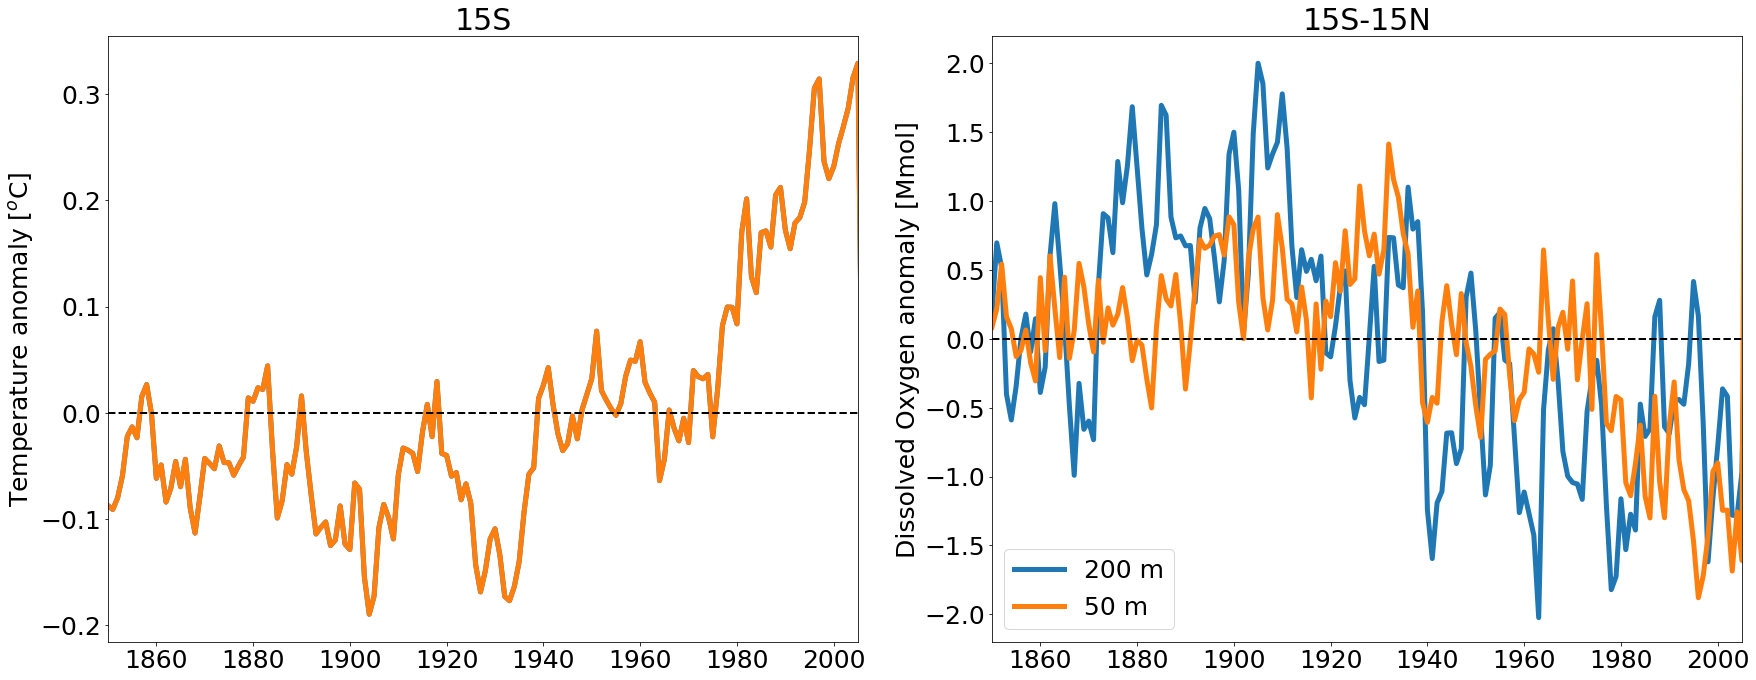

In [24]:
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_30S_200m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_30S_50m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,np.zeros(len(cesm_temp_200m_ds.TEMP.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.title('15S')
plt.ylabel('Temperature anomaly [$^o$C]')

plt.subplot(122)
plt.plot(cesm_o2_200m_ds.O2.year,o2_30S_200m_amom_ds,label = '200 m')
plt.plot(cesm_o2_50m_ds.O2.year,o2_30S_50m_amom_ds,label = '50 m')
plt.plot(cesm_o2_200m_ds.O2.year,np.zeros(len(cesm_o2_200m_ds.O2.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.legend(loc = 3)
plt.title('15S-15N')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.ylim(-2.2,2.2)

plt.tight_layout()

In [25]:
##Exercise 2:  Perform the same calculation plot  the region between 15N - 60N and North of 60N

def F_60N(var):
    """sample North of 60N"""
    var_60N_ds = var.where(var['TLAT'] <= -60, drop=True)
    
    return var_60N_ds

def F_15N_60N(var):
    """sample 15N - 60N"""
    var_15N_ds = var.where(var['TLAT'] <= -15, drop=True)
    var_15S_60N_ds = var_60N_ds.where(var_60N_ds['TLAT'] > -60, drop=True)
    
    return var_15N_60N_ds
### computes regional anomalies time series 
temp_15S_200m_amom_ds = F_time_series_anomalies(F_15S(cesm_temp_200m_ds.TEMP),F_15S(area_ds.TAREA))
temp_15S_50m_amom_ds = F_time_series_anomalies(F_15S(cesm_temp_50m_ds.TEMP),F_15S(area_ds.TAREA))
temp_15S_15N_200m_amom_ds = F_time_series_anomalies(F_15S_15N(cesm_temp_50m_ds.TEMP),F_15S_15N(area_ds.TAREA))
temp_15S_15N_50m_amom_ds = F_time_series_anomalies(F_15S_15N(cesm_temp_50m_ds.TEMP),F_15S_15N(area_ds.TAREA))

o2_15S_200m_amom_ds = F_time_series_anomalies(F_15S(cesm_o2_200m_ds.O2),F_15S(area_ds.TAREA))
o2_15S_50m_amom_ds = F_time_series_anomalies(F_15S(cesm_o2_50m_ds.O2),F_15S(area_ds.TAREA))
o2_15S_15N_200m_amom_ds = F_time_series_anomalies(F_15S_15N(cesm_o2_200m_ds.O2),F_15S_15N(area_ds.TAREA))
o2_15S_15N_50m_amom_ds = F_time_series_anomalies(F_15S_15N(cesm_o2_50m_ds.O2),F_15S_15N(area_ds.TAREA))

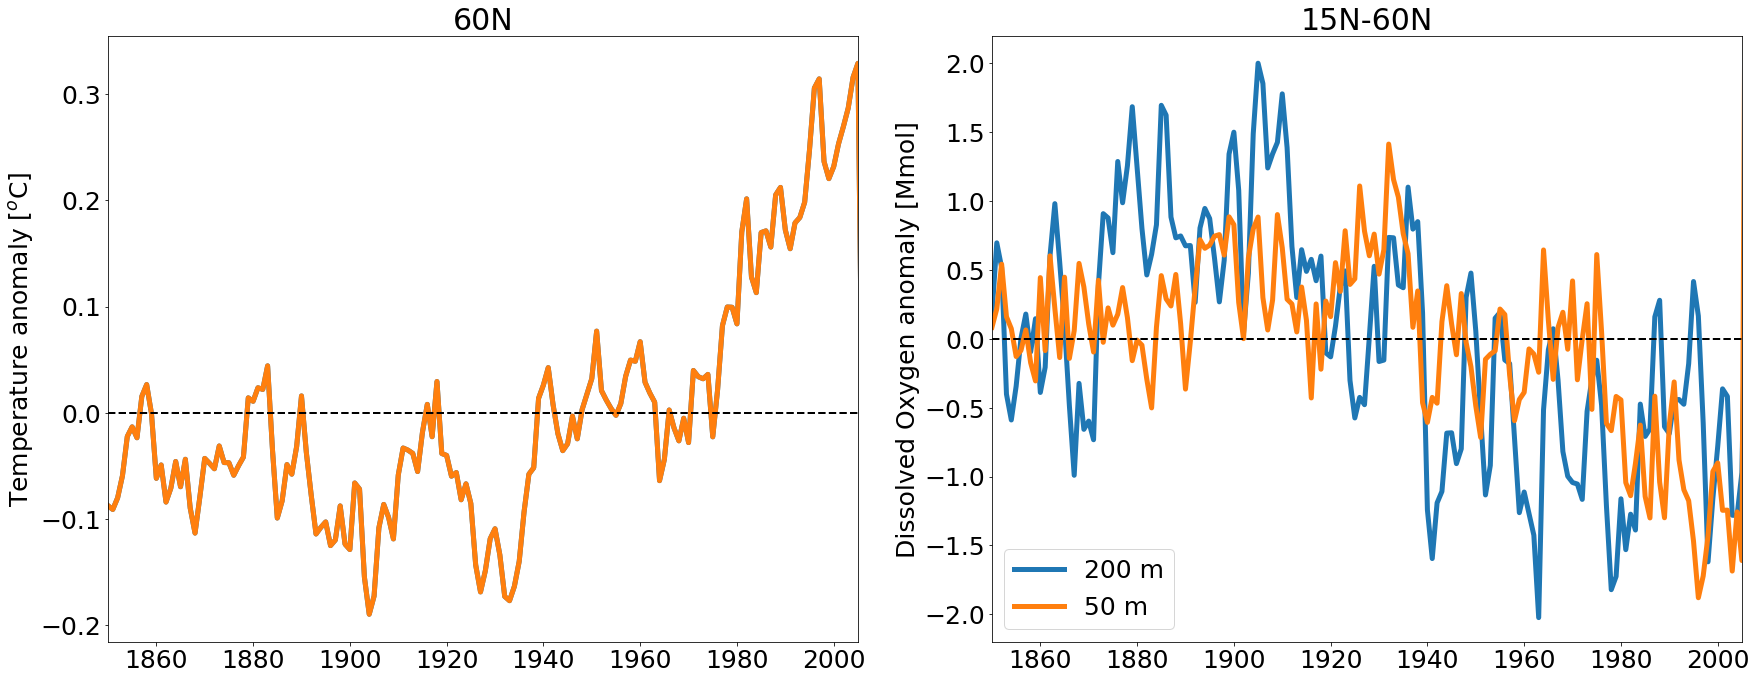

In [26]:
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_30S_200m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,temp_30S_50m_amom_ds)
plt.plot(cesm_temp_200m_ds.TEMP.year,np.zeros(len(cesm_temp_200m_ds.TEMP.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.title('60N')
plt.ylabel('Temperature anomaly [$^o$C]')

plt.subplot(122)
plt.plot(cesm_o2_200m_ds.O2.year,o2_30S_200m_amom_ds,label = '200 m')
plt.plot(cesm_o2_50m_ds.O2.year,o2_30S_50m_amom_ds,label = '50 m')
plt.plot(cesm_o2_200m_ds.O2.year,np.zeros(len(cesm_o2_200m_ds.O2.year)),'--',linewidth = 2,color = 'k')
plt.xlim(1850,2005)
plt.legend(loc = 3)
plt.title('15N-60N')
plt.ylabel('Dissolved Oxygen anomaly [Mmol]')
plt.ylim(-2.2,2.2)

plt.tight_layout()

C:\Users\Miranda Sitofie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Miranda Sitofie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


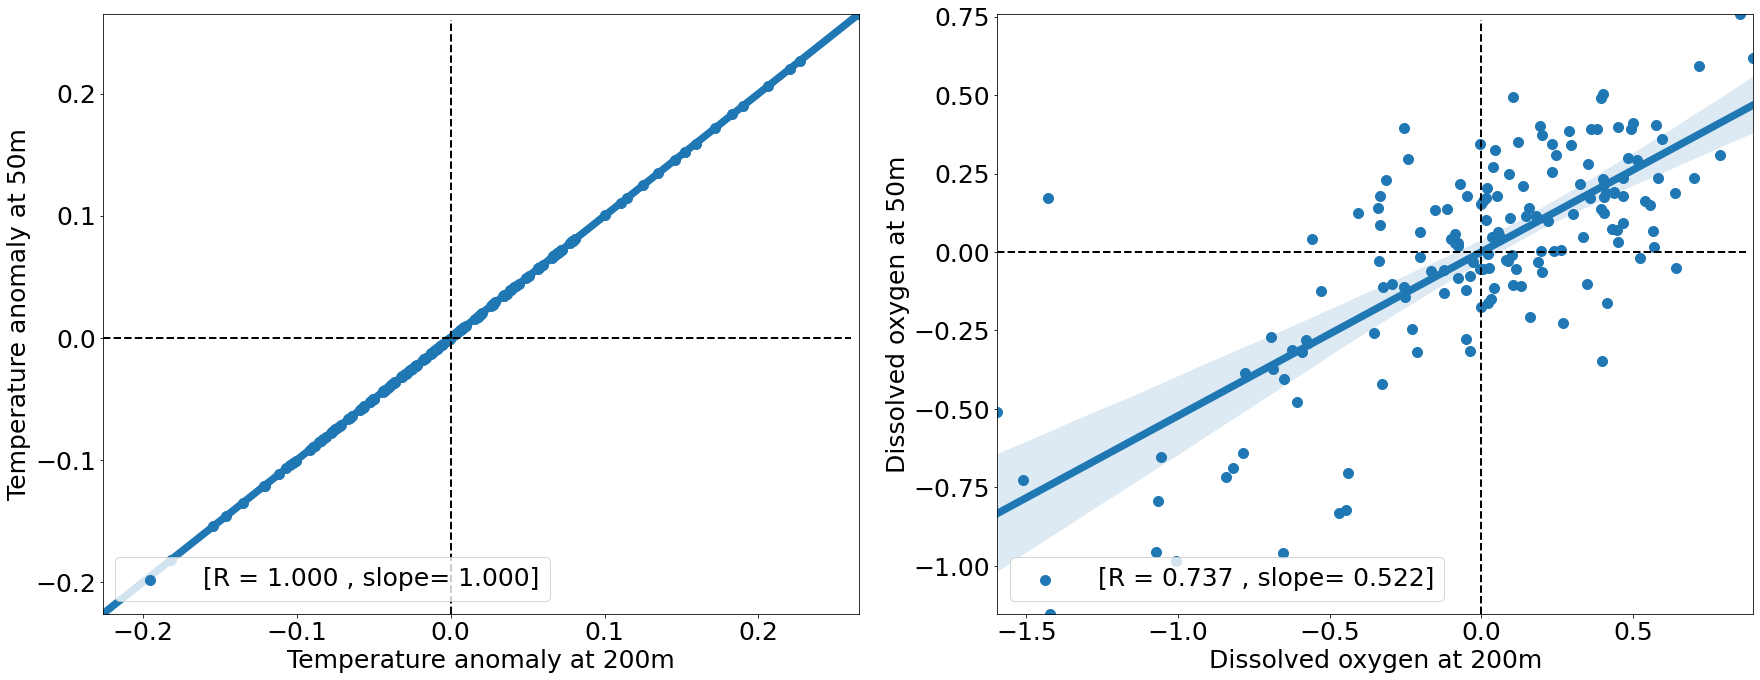

In [27]:
##Exercise 3: Calculate the regression and slope (m, {y = mx + c}) of temperature at 50m with respect to temperature at 200 m

plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

plt.subplot(121)
X = temp_200m_amom_ds.TAREA
Y = temp_50m_amom_ds.TAREA
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
sns.regplot(X, Y)
plt.xlim(temp_200m_amom_ds.TAREA.min(),temp_200m_amom_ds.TAREA.max())
plt.ylim(temp_50m_amom_ds.TAREA.min(),temp_50m_amom_ds.TAREA.max())

plt.plot(np.arange(temp_200m_amom_ds.TAREA.min(),temp_200m_amom_ds.TAREA.max(),abs(temp_200m_amom_ds.TAREA.min()-temp_200m_amom_ds.TAREA.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(temp_50m_amom_ds.TAREA.min(),temp_50m_amom_ds.TAREA.max(),abs(temp_50m_amom_ds.TAREA.min()-temp_50m_amom_ds.TAREA.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Temperature anomaly at 200m')
plt.ylabel('Temperature anomaly at 50m')
plt.legend(loc= 3)

plt.subplot(122)
X = o2_200m_amom_ds.TAREA
Y = o2_50m_amom_ds.TAREA
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 100,label = f' [R = {r:0.3f} , slope= {slope:0.3f}]')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('Dissolved oxygen at 200m')
plt.ylabel('Dissolved oxygen at 50m')
plt.legend(loc= 3)

plt.tight_layout()

In [ ]:
##Exercise 4: Plot a probability density function(pdf) of temperature and dissolved oxygen (50m and 500m) using two different methods 
## hint; searbon provide one method to do this.

Wall time: 0 ns


(array([ 2.,  3., 14., 40., 45., 27., 13.,  6.,  4.,  3.]),
 array([-0.22579888, -0.17670354, -0.1276082 , -0.07851287, -0.02941753,
         0.01967781,  0.06877315,  0.11786849,  0.16696383,  0.21605917,
         0.26515451]),
 <BarContainer object of 10 artists>)

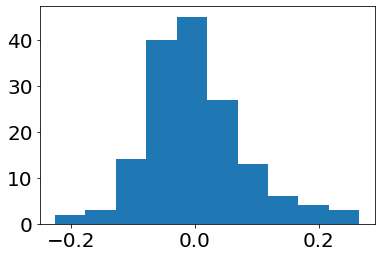

In [50]:
##plot a probability density function
##calculate time series
%time
## calculate long-term time series anomalies 

def F_time_series_wmean(var,area):
    """computes time series anamolies"""
    
    ## calculate the anomaly by removing the mean 
    var_anomaly = var - var.mean('year')
    
    ## compute total area sum
    area_sum_ds = area.sum(dim = ['nlon','nlat'])
    
    ## calculate the weighted mean
    var_anomaly_ds = ((var_anomaly*area).sum(dim = ['nlon','nlat']))/area_sum_ds
    
    return var_anomaly_ds.TAREA
    
temp_200m_wmean_ds = F_time_series_wmean(cesm_temp_200m_ds.TEMP,area_ds)

plt.hist(temp_200m_wmean_ds)
#sns.regplot(temp_200m_amom_ds)